In [ ]:
from tensorflow import keras

In [ ]:
from keras import datasets
(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


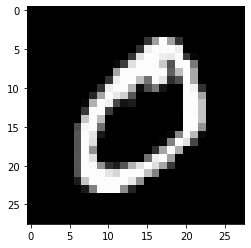

In [ ]:
import matplotlib.pyplot as plt
img = 1
plt.imshow(x_train[img],cmap='gray')
plt.show()

In [ ]:
import numpy as np
len(np.unique(y_train))

10

In [ ]:
class_names = ["zero-0","one-1","two-2","three-3","four-4","five-5","six-6","seven-7","eight-8","nine-9"]

In [ ]:
print(class_names[y_train[img]])

zero-0


In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(400,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
x_train[104]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 253,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 251,
        149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer='adam', metrics=['accuracy'])

In [ ]:
result = model.fit(x_train, y_train, epochs=7,validation_split=0.2)

Epoch 1/7
1500/1500 [==============================] - 9s 5ms/step - loss: 8.9332 - accuracy: 0.8518 - val_loss: 0.5181 - val_accuracy: 0.9321
Epoch 2/7
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3737 - accuracy: 0.9369 - val_loss: 0.3385 - val_accuracy: 0.9413
Epoch 3/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2742 - accuracy: 0.9449 - val_loss: 0.3372 - val_accuracy: 0.9434
Epoch 4/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2455 - accuracy: 0.9521 - val_loss: 0.3975 - val_accuracy: 0.9357
Epoch 5/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2339 - accuracy: 0.9519 - val_loss: 0.3528 - val_accuracy: 0.9383
Epoch 6/7
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2134 - accuracy: 0.9520 - val_loss: 0.3704 - val_accuracy: 0.9399
Epoch 7/7
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1902 - accuracy: 0.9599 - val_loss: 0.3935 - val_accuracy: 0.9384

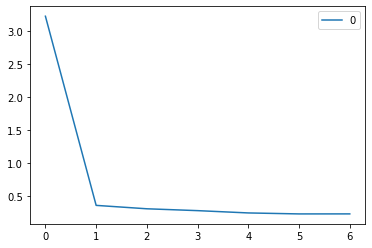

In [ ]:
import pandas as pd
pd.DataFrame(result.history['loss']).plot()

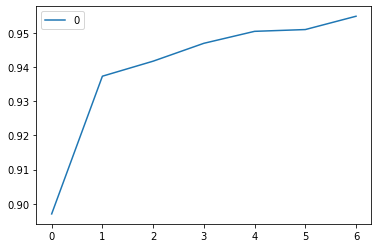

In [ ]:
pd.DataFrame(result.history['accuracy']).plot()

In [ ]:
y_pred = model.predict_classes(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

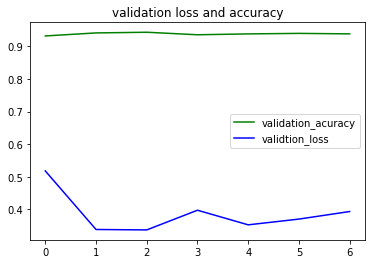

In [ ]:
val_acc = result.history['val_accuracy']
val_loss = result.history['val_loss']
#epochs = range(1,8)
plt.plot(val_acc,'g',label='validation_acuracy')
plt.plot(val_loss,'b',label='validtion_loss')
plt.title("validation loss and accuracy")
plt.legend()
plt.show()

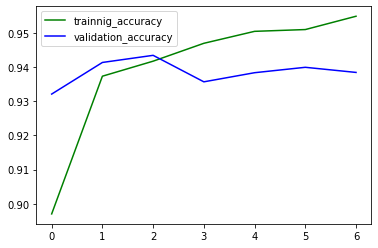

In [ ]:
train_acc = result.history['accuracy']
val_acc1 = result.history['val_accuracy']
plt.plot(train_acc,'g',label='trainnig_accuracy')
plt.plot(val_acc1,'b',label="validation_accuracy")
plt.legend()
plt.show()

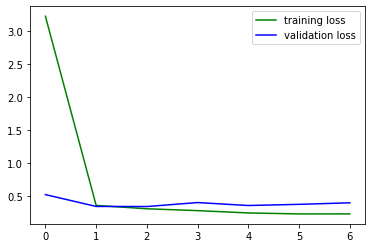

In [ ]:
train_loss1 = result.history['loss']
val_loss1 = result.history['val_loss']
plt.plot(train_loss1,'g',label='training loss')
plt.plot(val_loss1,'b',label='validation loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)*100

93.91000000000001

In [ ]:
model.save("mnistminiproj.hdf5")